In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
x = np.arange(-5,5,0.05)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0,x)

def leaky_relu(x, alpha=0.1):
    y = np.zeros_like(x)
    y = np.maximum(0,x) + alpha * np.minimum(0,x)
    return y

def maxout(x_0, x_1):
    assert x_0.shape == x_1.shape
    return np.maximum(x_0, x_1)

def dsig_dx(x):
    return sigmoid(x) * (1 - sigmoid(x))

def dtanh_dx(x):
    return 1 - np.tanh(x)**2

def drelu_dx(x):
    y = np.zeros_like(x)
    y[x > 0] = 1.
    y[x<= 0] = 0.
    return y

def dlrelu_dx(x, alpha=0.1):
    y = np.zeros_like(x)
    y[x > 0] = 1.
    y[x<= 0] = alpha
    return y

#test it
# print(sigmoid(1))
# print(sigmoid(np.array([0,1])))


In [4]:
sig_y = sigmoid(x)
dsig_y = dsig_dx(x)

tanh_y = tanh(x)
dtanh_y = dtanh_dx(x)

relu_y = relu(x)
drelu_y = drelu_dx(x)

lrelu_y = leaky_relu(x)
dlrelu_y = dlrelu_dx(x)

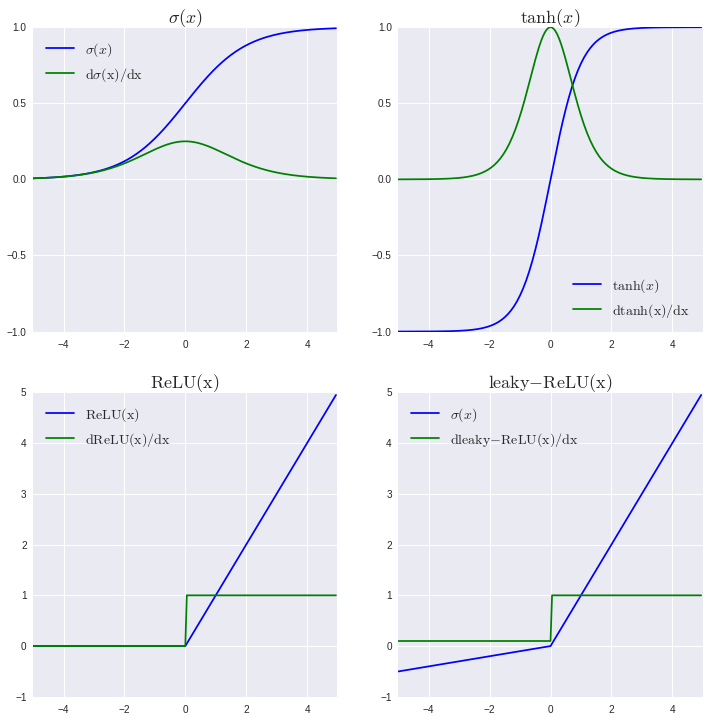

In [5]:
plt.figure(figsize=(12,12))

#f, axarr = plt.subplots(2, sharex=True)
#axarr[0], axarr[1] store plots
plt.subplot(221)
plt.plot(x, sig_y, c='b', label="$\\sigma(x)$")
plt.plot(x, dsig_y, c='g', label="$\\rm{d}\\sigma(x)/\\rm{d}x$")
plt.xlim([-5,5])
plt.ylim([-1.,1.])
# plt.xlabel('$x$', fontsize=16)
plt.title("$\sigma(x)$", fontsize=18)
plt.legend(loc='best', fontsize=14)

plt.subplot(222)
plt.plot(x, tanh_y, c='b', label="$\\tanh(x)$")
plt.plot(x, dtanh_y, c='g', label="$\\rm{d}\\tanh(x)/\\rm{d}x$")
plt.xlim([-5,5])
plt.ylim([-1.,1])
# plt.xlabel('$x$', fontsize=16)
plt.title("$\\tanh(x)$", fontsize=18)
plt.legend(loc='best', fontsize=14)

plt.subplot(223)
plt.plot(x, relu_y, c='b', label="$\\rm{ReLU}(x)$")
plt.plot(x, drelu_y, c='g', label="$\\rm{d}\\rm{ReLU}(x)/\\rm{d}x$")
plt.xlim([-5,5])
plt.ylim([-1.,5])
# plt.xlabel('$x$', fontsize=16)
plt.title("$\\rm{ReLU}(x)$", fontsize=18)
plt.legend(loc='best', fontsize=14)

plt.subplot(224)
plt.plot(x, lrelu_y, c='b', label="$\\sigma(x)$")
plt.plot(x, dlrelu_y, c='g', label="$\\rm{d}\\rm{leaky-ReLU}(x)/\\rm{d}x$")
plt.xlim([-5,5])
plt.ylim([-1,5])
# plt.xlabel('$x$', fontsize=16)
plt.title("$\\rm{leaky-ReLU}(x)$", fontsize=18)
plt.legend(loc='best', fontsize=14)
